In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
clean_data_dir = os.path.join('..','data_files','clean_data')
lake_colors_d = {'Lake Superior':'blue',
                 'Lake Michigan':'red',
                 'Lake Huron':'green',
                 'Lake Erie':'purple',
                 'Lake Ontario':'orange'}

In [3]:
lake_stats = pd.read_csv(os.path.join(clean_data_dir,'lake_stats.csv'),index_col=0)
lakes = lake_stats.index.tolist()
lake_ls = ['Lake '+ x for x in lakes]
lake_ls

['Lake Superior', 'Lake Michigan', 'Lake Huron', 'Lake Erie', 'Lake Ontario']

In [4]:
ice_coverage = pd.read_csv(os.path.join('..','data_files','ice_data','ice_coverage.csv'),index_col='Date')
# ice_coverage (not use it)

In [5]:
DTX32_erie_df = pd.read_csv(os.path.join('..','data_files','api_calls','Erie_22-27_GSOM.csv'),index_col='datatype')
DX32_erie_df = DTX32_erie_df[['date','value']].loc['DX32',["date","value"]]
DX32_erie_df
# This is the all values with DT32

DX32_erie_df['date'].str.split("-")

datatype
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
                 ...           
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
Name: date, Length: 22233, dtype: object

In [6]:
median_winter_month =[]
year_list=['1995','1996','1997','1998','1999']
my_list = ['01','02','03','04','05']
for y in year_list:
    for i in my_list:
        year_month_df = pd.DataFrame(DX32_erie_df['date'].apply(lambda row: row.split('-')[:2]))
        year_month_df['year'] = year_month_df['date'].apply(lambda row: row[0])
        year_month_df['month'] = year_month_df['date'].apply(lambda row: row[1])
        year_month_df = year_month_df.drop('date', axis=1)
        year_month_df['value']= DX32_erie_df['value']
        months_years = year_month_df.loc[(year_month_df["year"] == y ) & (year_month_df['month'] == i )]["value"].mean()
        # year_month_df['date'].apply(lambda row: dt.datetime(year=int(row[0]), month=int(row[1])))
        median_winter_month.append(months_years)

mean_1995 = median_winter_month[0:5]
mean_1996 = median_winter_month[5:10]
mean_1997 = median_winter_month[10:15]
mean_1998 = median_winter_month[15:20]
mean_1999 = median_winter_month[20:25]



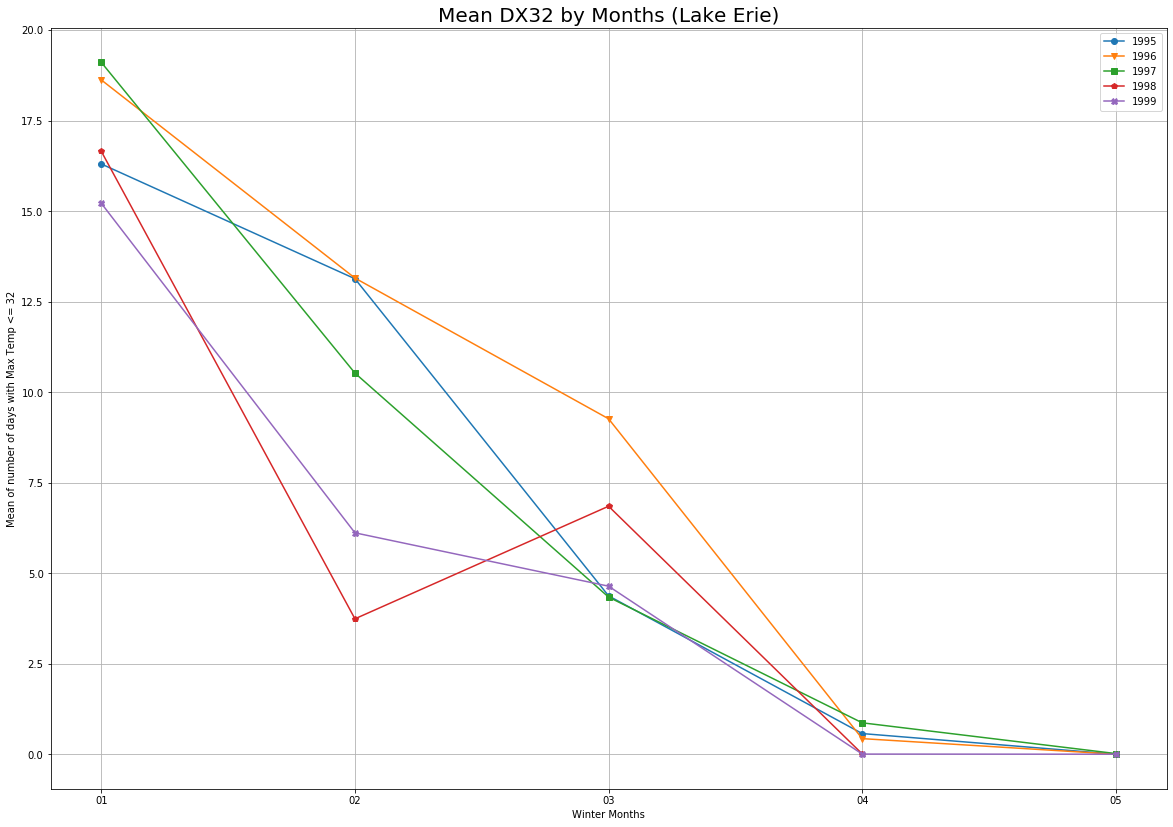

In [13]:
plt.figure(figsize=(20,14))
plt.title('Mean DX32 by Months (Lake Erie)', fontsize=20)
plt.plot(my_list,mean_1995,'o-', label= "1995")
plt.plot(my_list,mean_1996,"v-",label= "1996")
plt.plot(my_list,mean_1997,'s-', label= "1997")
plt.plot(my_list,mean_1998,'p-',label= "1998")
plt.plot(my_list,mean_1999,'X-',label= "1999")

plt.xlabel('Winter Months')
plt.ylabel('Mean of number of days with Max Temp <= 32')
plt.legend()
plt.grid()
plt.savefig(os.path.join('..','images','MeanDX32Months.png'))
plt.show()